<a href="https://colab.research.google.com/github/ziyasarican/Kaggle/blob/main/HousePrices-AdvancadRegressionTechniques/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1016]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1017]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1018]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1019]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1020]:
numeric_columns_train = train.select_dtypes(include=np.number)
numeric_columns_test = test.select_dtypes(include=np.number)
numeric_columns_train.corr()['SalePrice'].sort_values()


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [1021]:
# I know there is no correlation Id-SalePrice. So I will remove corr point ≤ Id 

removed_numeric_columns = ['Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2']
numeric_columns_train.drop(removed_numeric_columns, axis=1, inplace=True)
numeric_columns_test.drop(removed_numeric_columns, axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1022]:
numeric_columns_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,548,0,61,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,460,298,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,608,0,42,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,642,0,35,272,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,836,192,84,0,0,0,0,12,2008,250000


In [1023]:
numeric_columns_train.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [1024]:
numeric_columns_test.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MoSold             0
YrSold             0
dtype: int64

In [1025]:
# fill nan values
numeric_columns_train.LotFrontage.fillna(numeric_columns_train['LotFrontage'].mean(), inplace = True)
numeric_columns_train.GarageYrBlt.fillna(numeric_columns_train['GarageYrBlt'].mean(), inplace = True)
numeric_columns_train.MasVnrArea.fillna(numeric_columns_train['MasVnrArea'].mean(), inplace = True)
numeric_columns_train.isnull().sum()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [1026]:
numeric_columns_test.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MoSold             0
YrSold             0
dtype: int64

In [1027]:
numeric_columns_test.LotFrontage.fillna(numeric_columns_test['LotFrontage'].mean(), inplace = True)
numeric_columns_test.MasVnrArea.fillna(numeric_columns_test['MasVnrArea'].mean(), inplace = True)
numeric_columns_test.BsmtFinSF1.fillna(numeric_columns_test['BsmtFinSF1'].mean(), inplace = True)
numeric_columns_test.BsmtUnfSF.fillna(numeric_columns_test['BsmtUnfSF'].mean(), inplace = True)
numeric_columns_test.TotalBsmtSF.fillna(numeric_columns_test['TotalBsmtSF'].mean(), inplace = True)
numeric_columns_test.BsmtFullBath.fillna(numeric_columns_test['BsmtFullBath'].mean(), inplace = True)
numeric_columns_test.GarageYrBlt.fillna(numeric_columns_test['GarageYrBlt'].mean(), inplace = True)
numeric_columns_test.GarageCars.fillna(numeric_columns_test['GarageCars'].mean(), inplace = True)
numeric_columns_test.GarageArea.fillna(numeric_columns_test['GarageArea'].mean(), inplace = True)
numeric_columns_test.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MoSold           0
YrSold           0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


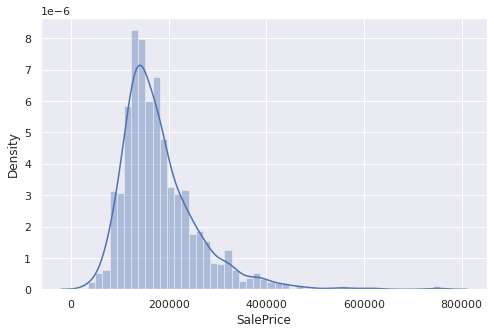

In [1028]:
import matplotlib.pyplot as plt
import seaborn as sbn

sbn.distplot(numeric_columns_train['SalePrice'])

In [1029]:
# Get columns names and draw scatter
temp = list(numeric_columns_train.columns.values)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

<Figure size 576x360 with 0 Axes>

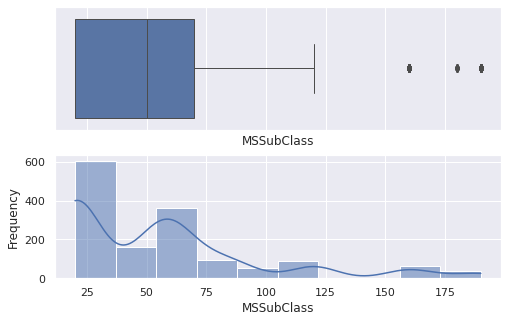

<Figure size 576x360 with 0 Axes>

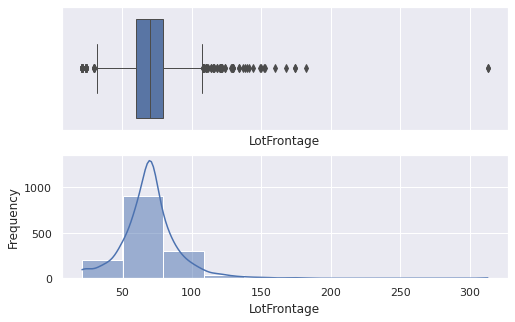

<Figure size 576x360 with 0 Axes>

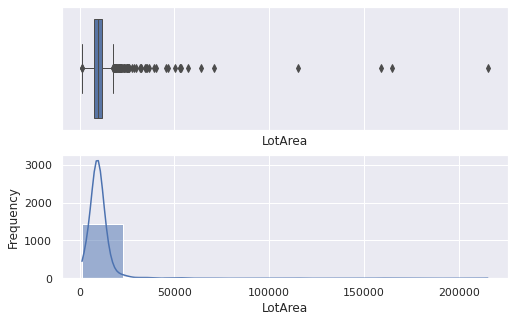

<Figure size 576x360 with 0 Axes>

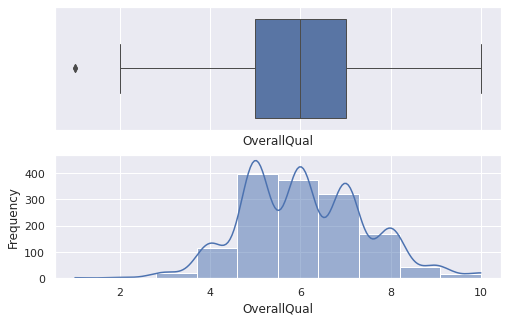

<Figure size 576x360 with 0 Axes>

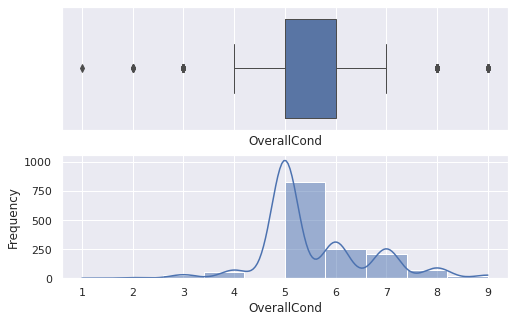

<Figure size 576x360 with 0 Axes>

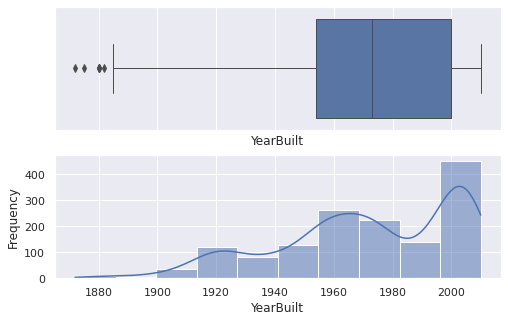

<Figure size 576x360 with 0 Axes>

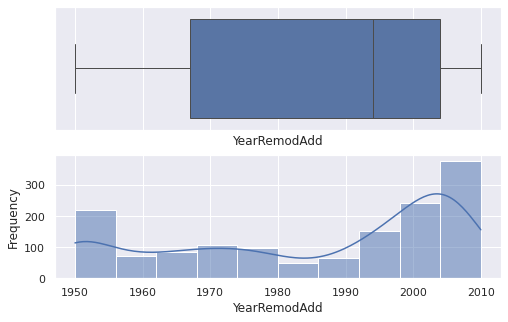

<Figure size 576x360 with 0 Axes>

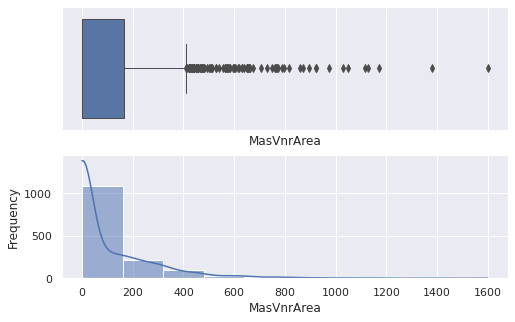

<Figure size 576x360 with 0 Axes>

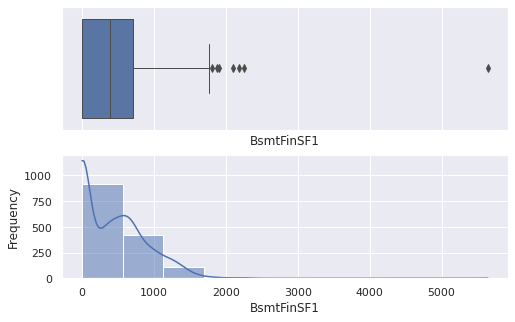

<Figure size 576x360 with 0 Axes>

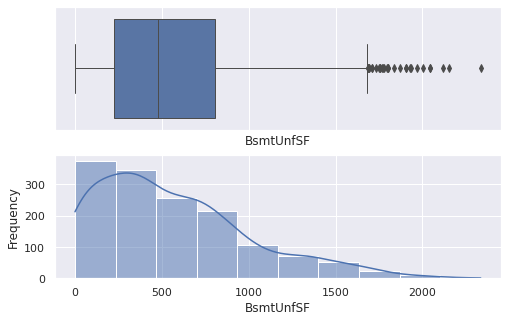

<Figure size 576x360 with 0 Axes>

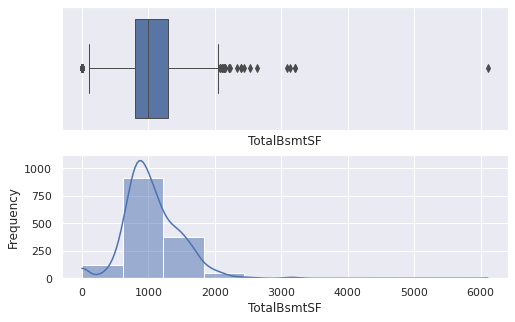

<Figure size 576x360 with 0 Axes>

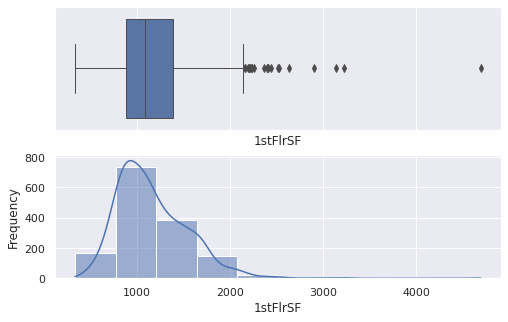

<Figure size 576x360 with 0 Axes>

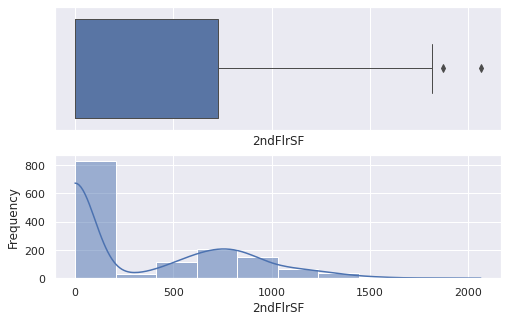

<Figure size 576x360 with 0 Axes>

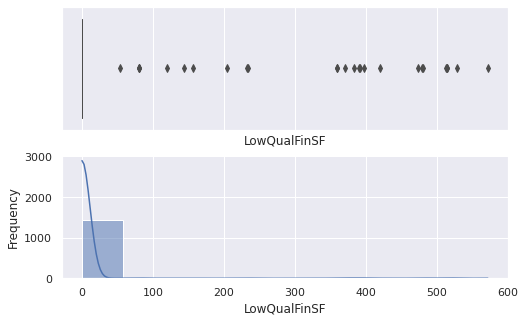

<Figure size 576x360 with 0 Axes>

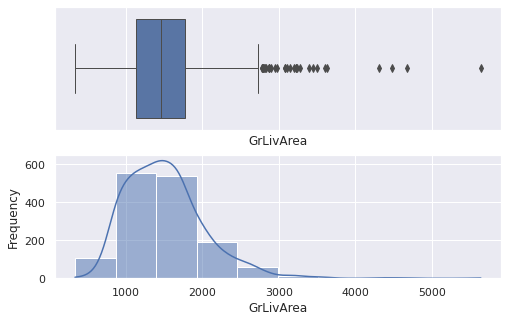

<Figure size 576x360 with 0 Axes>

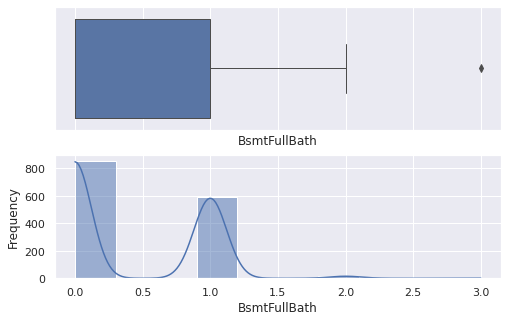

<Figure size 576x360 with 0 Axes>

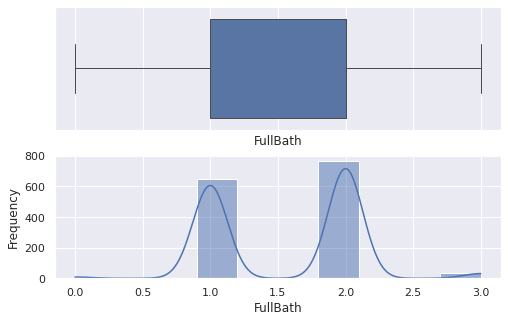

<Figure size 576x360 with 0 Axes>

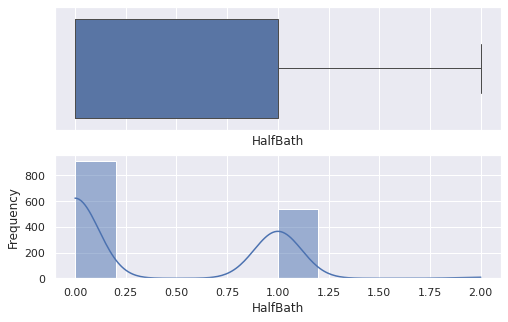

<Figure size 576x360 with 0 Axes>

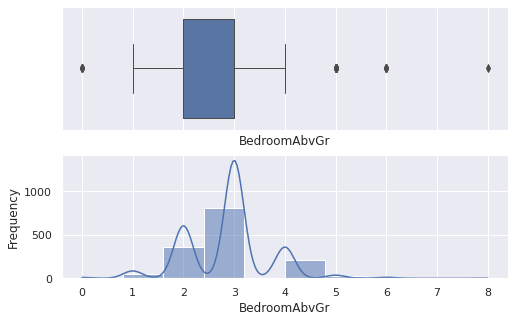

<Figure size 576x360 with 0 Axes>

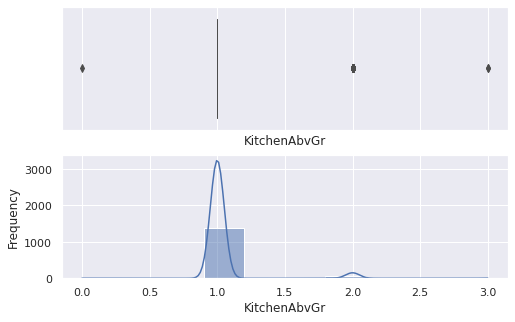

<Figure size 576x360 with 0 Axes>

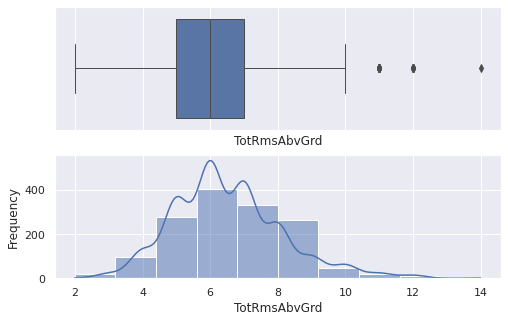

<Figure size 576x360 with 0 Axes>

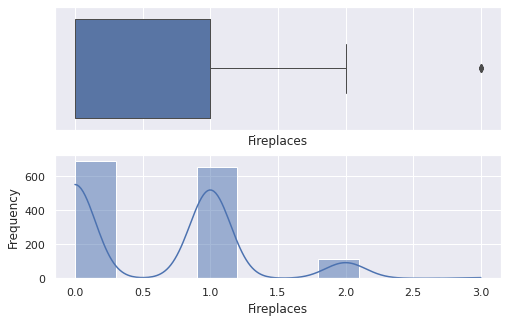

<Figure size 576x360 with 0 Axes>

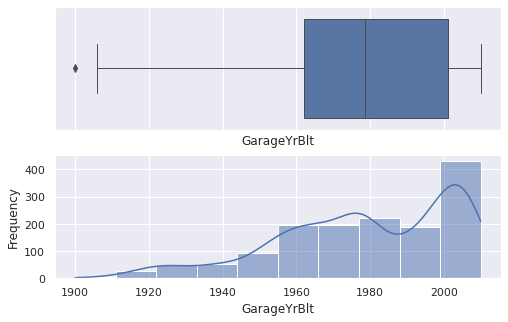

<Figure size 576x360 with 0 Axes>

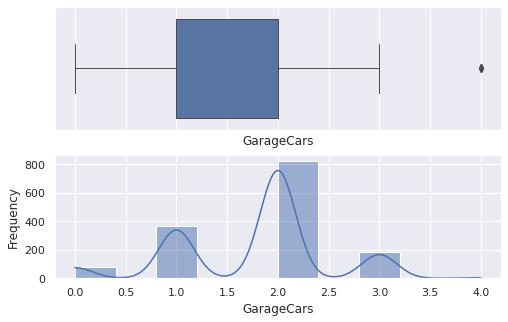

<Figure size 576x360 with 0 Axes>

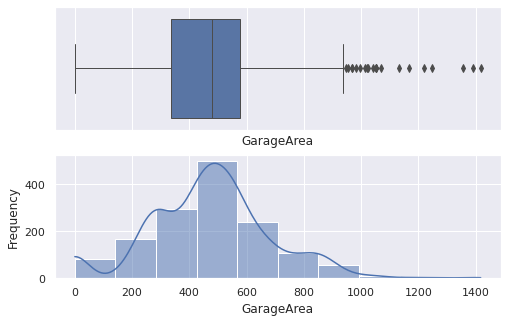

<Figure size 576x360 with 0 Axes>

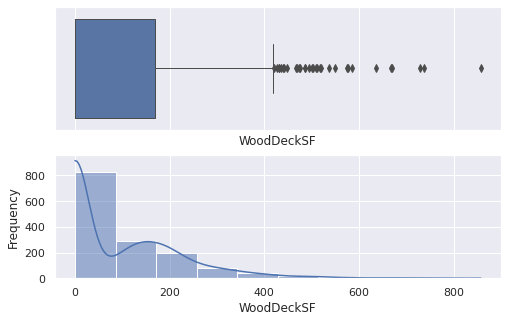

<Figure size 576x360 with 0 Axes>

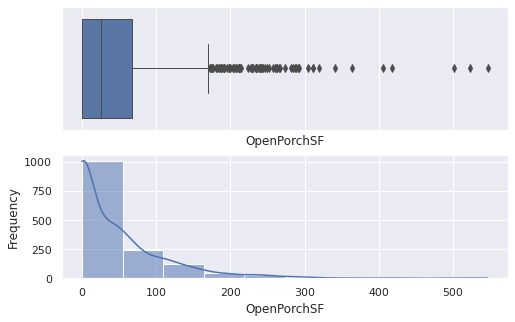

<Figure size 576x360 with 0 Axes>

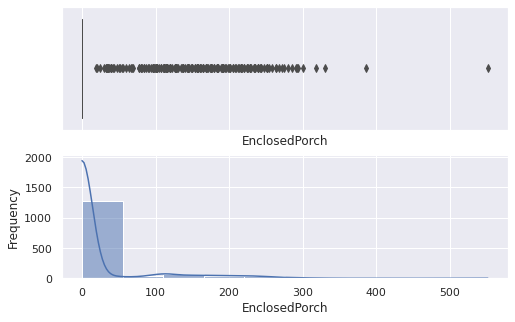

<Figure size 576x360 with 0 Axes>

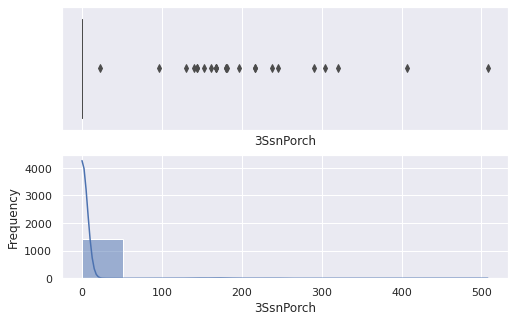

<Figure size 576x360 with 0 Axes>

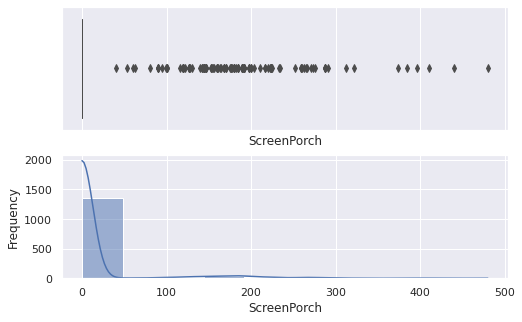

<Figure size 576x360 with 0 Axes>

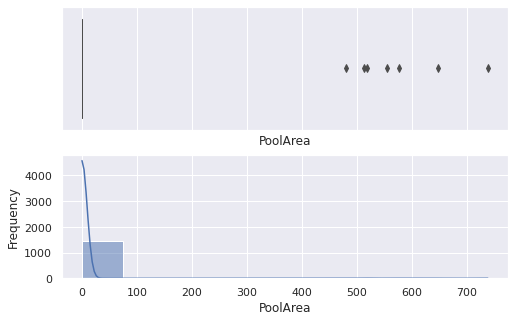

<Figure size 576x360 with 0 Axes>

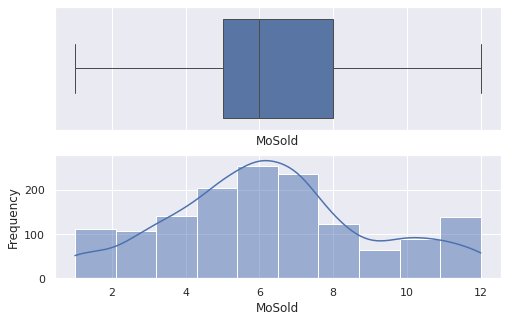

<Figure size 576x360 with 0 Axes>

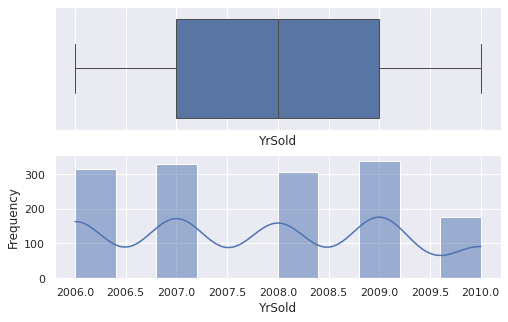

<Figure size 576x360 with 0 Axes>

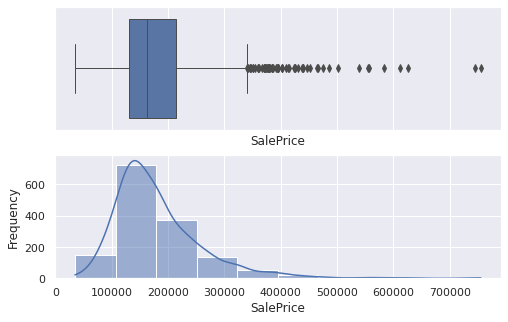

In [1030]:
for i in numeric_columns_train.columns:
    plt.figure()
    plt.tight_layout()
    sbn.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel=i, ylabel='Frequency')
    sbn.boxplot(numeric_columns_train[i], ax=ax_box , linewidth= 1.0)
    sbn.histplot(numeric_columns_train[i], ax=ax_hist , bins = 10,kde=True)

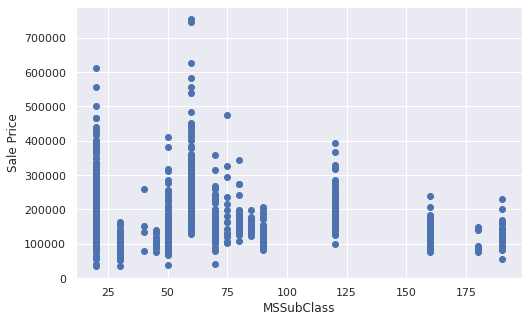

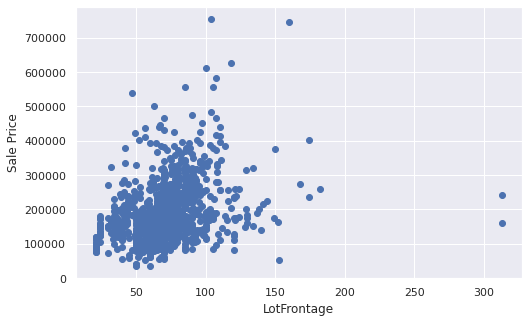

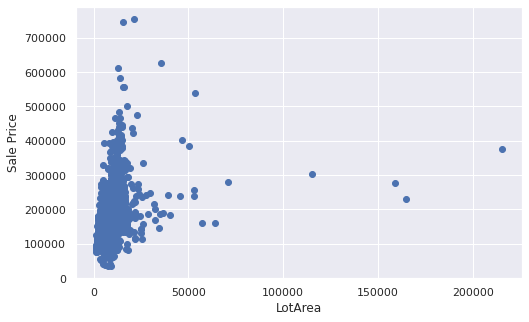

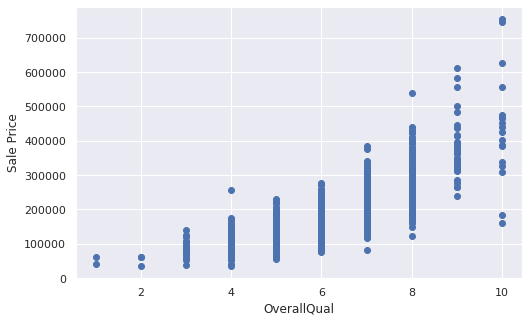

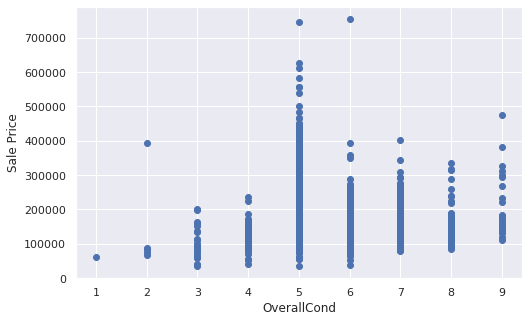

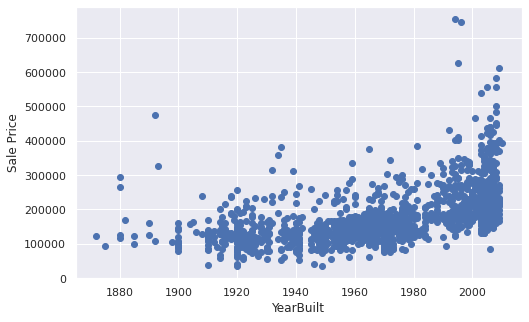

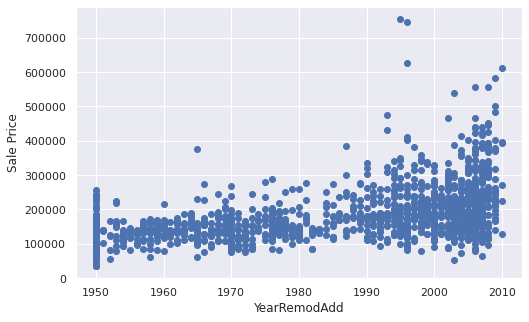

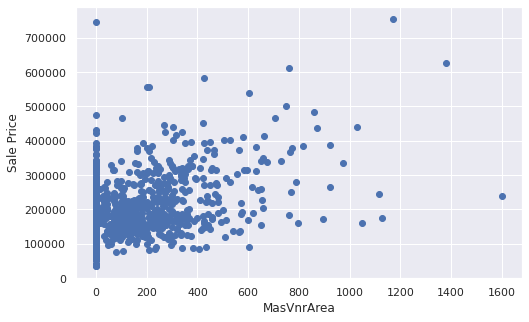

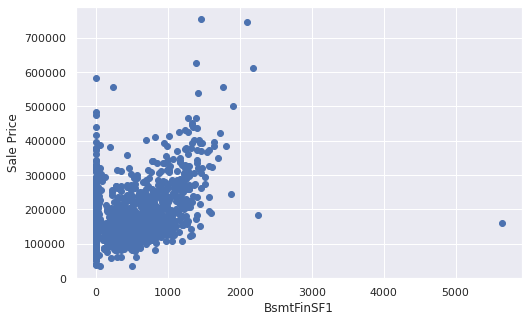

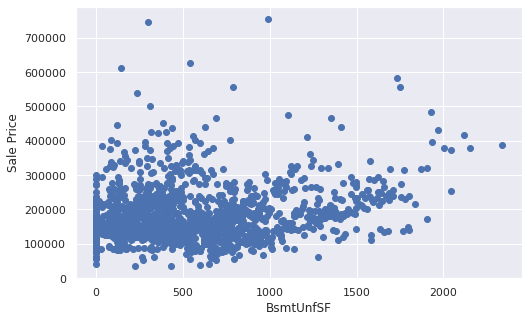

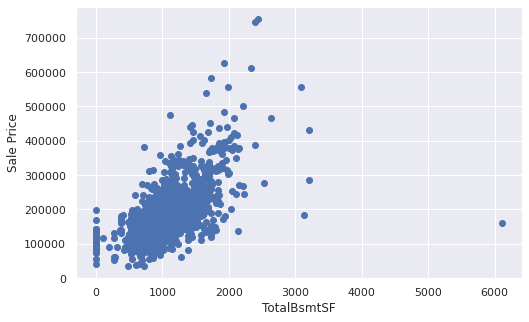

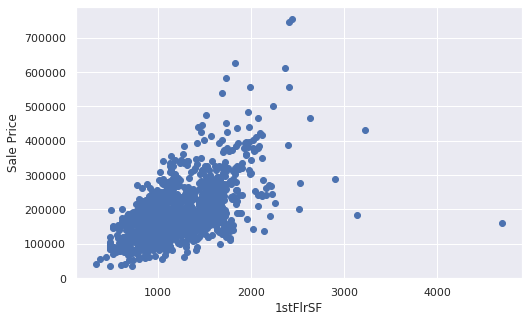

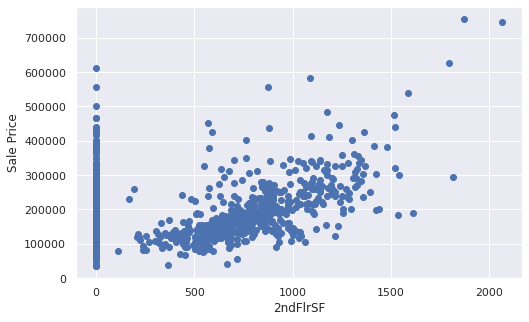

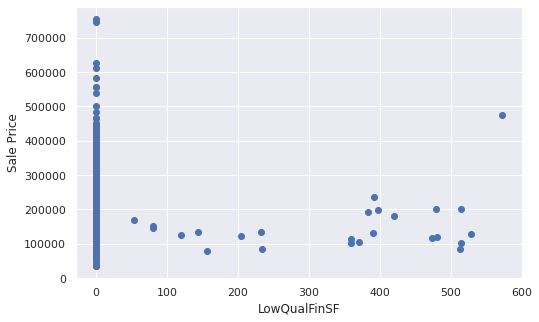

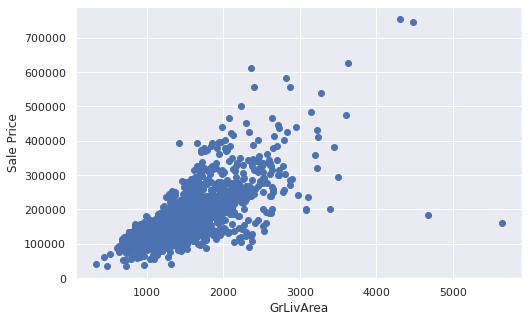

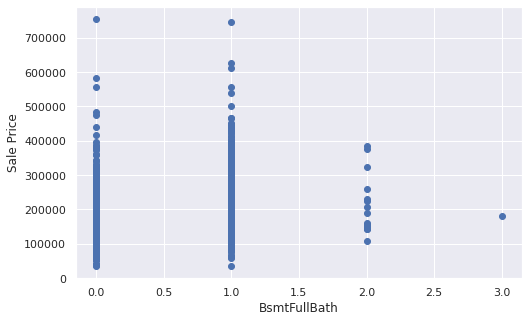

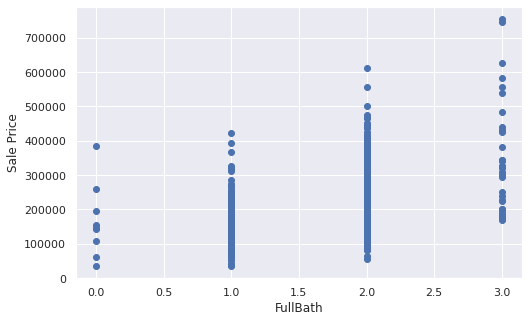

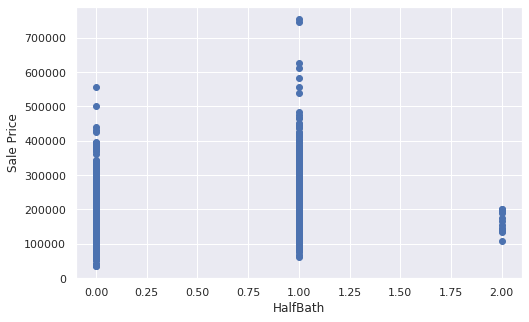

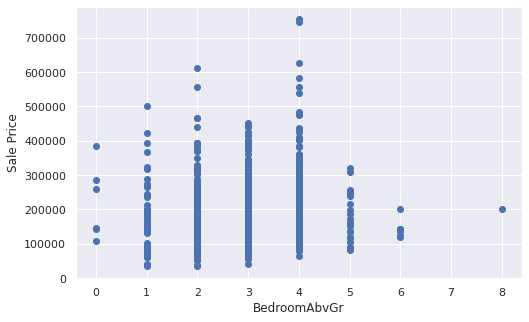

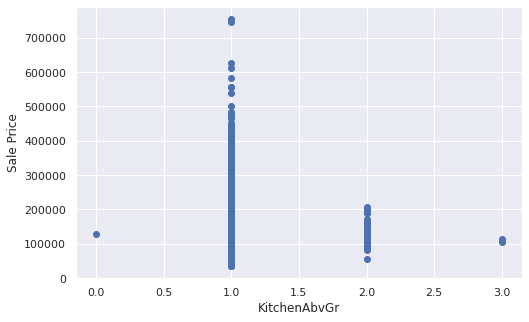

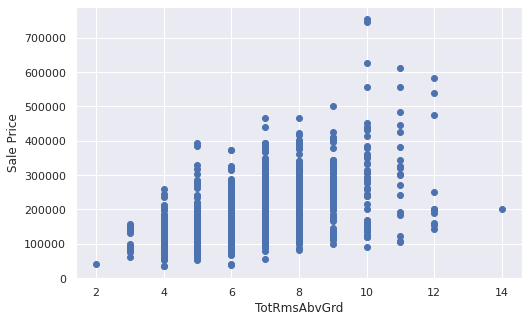

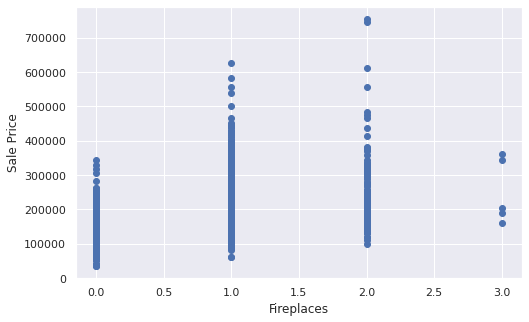

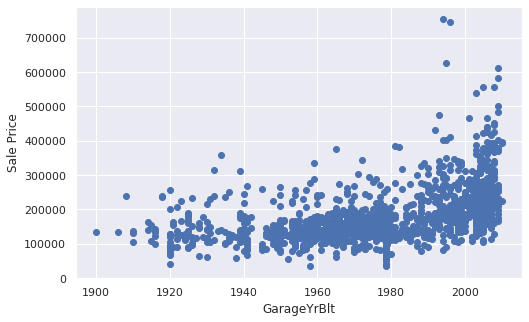

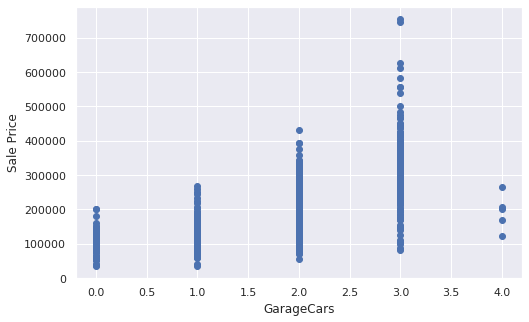

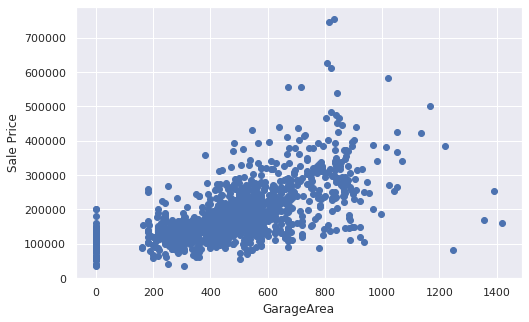

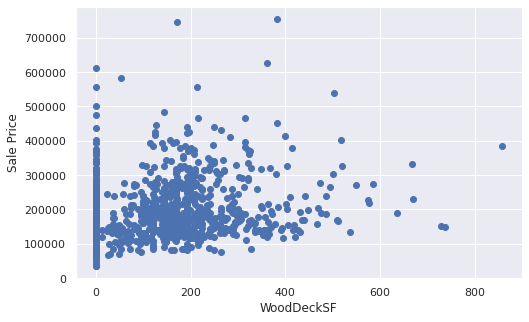

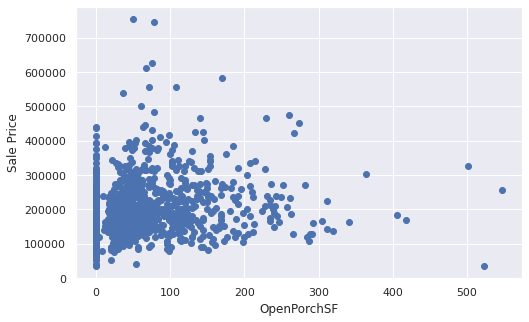

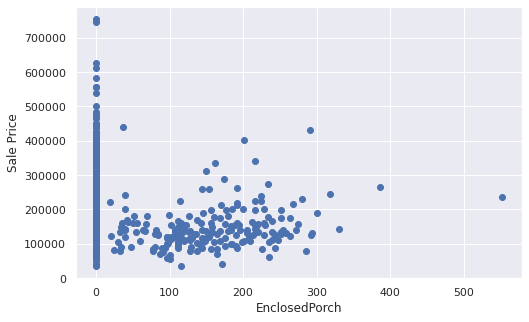

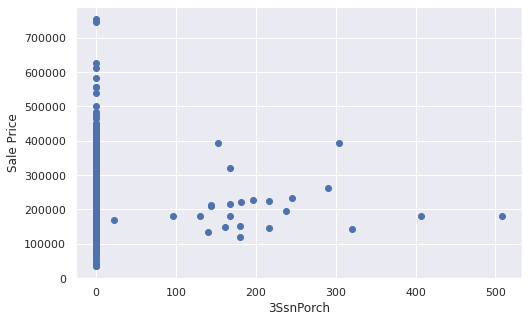

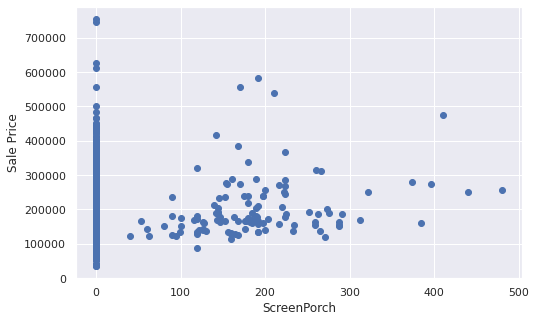

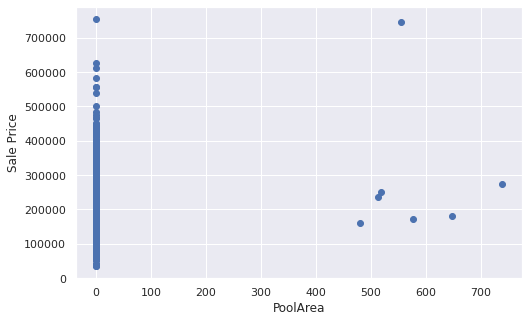

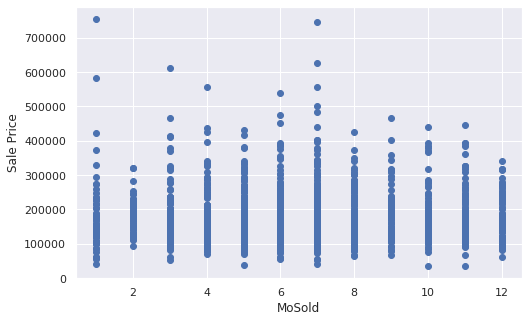

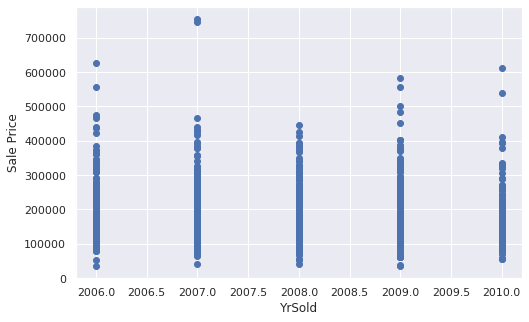

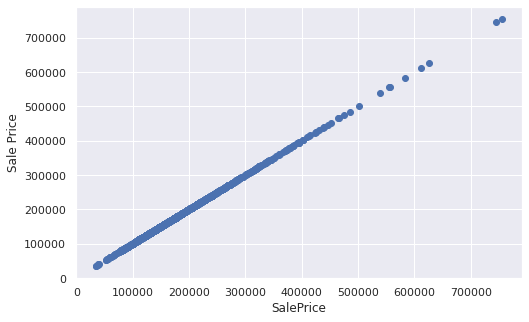

In [1031]:
for i in numeric_columns_train.columns:
    plt.scatter(numeric_columns_train[i],numeric_columns_train['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('Sale Price')
    plt.show()

In [1032]:
object_columns_train = train.select_dtypes(include='object')
object_columns_test = test.select_dtypes(include='object')
object_columns_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [1033]:
# There are many nan values some columns. Best way delete it
object_columns_train.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [1034]:
delete_columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
object_columns_train.drop(delete_columns, axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1035]:
object_columns_test.drop(delete_columns, axis=1, inplace=True)

In [1036]:
# Some features have too many different values. So we can remove these
# Ex: Neighborhood, Exterior1st, Exterior2nd.
# But I believe that Neighborhood is important for SalePrice.
for col in object_columns_train:
  print(col, '-', object_columns_train[col].nunique())

MSZoning - 5
Street - 2
LotShape - 4
LandContour - 4
Utilities - 2
LotConfig - 5
LandSlope - 3
Neighborhood - 25
Condition1 - 9
Condition2 - 8
BldgType - 5
HouseStyle - 8
RoofStyle - 6
RoofMatl - 8
Exterior1st - 15
Exterior2nd - 16
MasVnrType - 4
ExterQual - 4
ExterCond - 5
Foundation - 6
BsmtQual - 4
BsmtCond - 4
BsmtExposure - 4
BsmtFinType1 - 6
BsmtFinType2 - 6
Heating - 6
HeatingQC - 5
CentralAir - 2
Electrical - 5
KitchenQual - 4
Functional - 7
GarageType - 6
GarageFinish - 3
GarageQual - 5
GarageCond - 5
PavedDrive - 3
SaleType - 9
SaleCondition - 6


In [1037]:
delete_columns = ['Exterior1st', 'Exterior2nd']
object_columns_train.drop(delete_columns, axis=1, inplace=True)
object_columns_test.drop(delete_columns, axis=1, inplace=True)

In [1038]:
# Values in some columns almost consist of a single value. I believe it will be more successful if we delete them.
# Street, LandContour, Condition1, RoofStyle, BsmtFitype2. less than nearly %1
for col in object_columns_train:
  print(object_columns_train[col].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [1039]:
delete_columns = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
object_columns_train.drop(delete_columns, axis=1, inplace=True)
object_columns_test.drop(delete_columns, axis=1, inplace=True)

In [1040]:
object_columns_train.isnull().sum()

MSZoning          0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
RoofStyle         0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [1041]:
object_columns_test.isnull().sum()

MSZoning          4
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
RoofStyle         0
MasVnrType       16
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       1
Functional        2
GarageType       76
GarageFinish     78
GarageQual       78
GarageCond       78
PavedDrive        0
SaleType          1
SaleCondition     0
dtype: int64

In [1042]:
# Fill nan values

object_columns_train['MSZoning'].value_counts()
# mostly RL, fill nan with RL

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [1043]:
object_columns_test['MSZoning'].fillna('RL', limit=4, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [1044]:
object_columns_train['MasVnrType'].value_counts()
# mostly None, fill nan with None

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1045]:
object_columns_train['MasVnrType'].fillna('None', limit=8, inplace=True)
object_columns_test['MasVnrType'].fillna('None', limit=16, inplace=True)

In [1046]:
object_columns_train['BsmtQual'].value_counts()
# mostly TA, fill nan with TA

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [1047]:
object_columns_train['BsmtQual'].fillna('TA', inplace=True)
object_columns_test['BsmtQual'].fillna('TA', inplace=True)

In [1048]:
object_columns_train['BsmtCond'].value_counts()
# mostly TA, fill nan with TA

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [1049]:
object_columns_train['BsmtCond'].fillna('TA', inplace=True)
object_columns_test['BsmtCond'].fillna('TA', inplace=True)

In [1050]:
object_columns_train['BsmtExposure'].value_counts()
# mostly No, fill nan with No

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [1051]:
object_columns_train['BsmtExposure'].fillna('TA', inplace=True)
object_columns_test['BsmtExposure'].fillna('TA', inplace=True)

In [1052]:
object_columns_train['BsmtFinType1'].value_counts()
# mostly Unf, fill nan with Unf

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [1053]:
object_columns_train['BsmtFinType1'].fillna('Unf', inplace=True)
object_columns_test['BsmtFinType1'].fillna('Unf', inplace=True)

In [1054]:
object_columns_train['BsmtFinType2'].value_counts()
# mostly Unf, fill nan with Unf

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [1055]:
object_columns_train['BsmtFinType2'].fillna('Unf', inplace=True)
object_columns_test['BsmtFinType2'].fillna('Unf', inplace=True)

In [1056]:
object_columns_train['Electrical'].value_counts()
# mostly SBrkr, fill nan with SBrkr

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1057]:
object_columns_train['Electrical'].fillna('SBrkr', inplace=True)

In [1058]:
object_columns_train['KitchenQual'].value_counts()
# mostly TA, fill nan with TA

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [1059]:
object_columns_test['KitchenQual'].fillna('TA', inplace=True)

In [1060]:
object_columns_train['Functional'].value_counts()
# mostly Typ, fill nan with Typ

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [1061]:
object_columns_test['Functional'].fillna('Typ', inplace=True)

In [1062]:
object_columns_train['GarageType'].value_counts()
# mostly Attchd, fill nan with Attchd

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1063]:
object_columns_train['GarageType'].fillna('Attchd', inplace=True)
object_columns_test['GarageType'].fillna('Attchd', inplace=True)

In [1064]:
object_columns_train['GarageFinish'].value_counts()
# mostly Unf, fill nan with Unf

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [1065]:
object_columns_train['GarageFinish'].fillna('Unf', inplace=True)
object_columns_test['GarageFinish'].fillna('Unf', inplace=True)

In [1066]:
object_columns_train['GarageQual'].value_counts()
# mostly TA, fill nan with TA

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [1067]:
object_columns_train['GarageQual'].fillna('TA', inplace=True)
object_columns_test['GarageQual'].fillna('TA', inplace=True)

In [1068]:
object_columns_train['GarageCond'].value_counts()
# mostly TA, fill nan with TA

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [1069]:
object_columns_train['GarageCond'].fillna('TA', inplace=True)
object_columns_test['GarageCond'].fillna('TA', inplace=True)

In [1070]:
object_columns_train['SaleType'].value_counts()
# mostly TA, fill nan with TA

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [1071]:
object_columns_test['SaleType'].fillna('WD', inplace=True)

In [1072]:
object_columns_train.isnull().sum()

MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [1073]:
object_columns_test.isnull().sum()

MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [1074]:
# Now encoding for categorical types

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for col in object_columns_train:
  object_columns_train[col] = label_encoder.fit_transform(object_columns_train[col])
  object_columns_test[col] = label_encoder.fit_transform(object_columns_test[col])
object_columns_train.head()

<ipython-input-1074-6b4afb47f589>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_columns_train[col] = label_encoder.fit_transform(object_columns_train[col])
<ipython-input-1074-6b4afb47f589>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_columns_test[col] = label_encoder.fit_transform(object_columns_test[col])


,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,3,3,4,0,5,2,0,5,1,...,4,2,6,1,1,4,4,2,8,4
1,3,3,3,2,0,24,1,0,2,1,...,4,3,6,1,1,4,4,2,8,4
2,3,0,3,4,0,5,2,0,5,1,...,4,2,6,1,1,4,4,2,8,4
3,3,0,3,0,0,6,2,0,5,1,...,4,2,6,5,2,4,4,2,8,0
4,3,0,3,2,0,15,2,0,5,1,...,4,2,6,1,1,4,4,2,8,4


In [1075]:
object_columns_test.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,3,3,4,0,12,1,0,2,1,...,3,3,6,1,2,3,4,2,8,4
1,3,0,3,0,0,12,2,0,2,3,...,3,2,6,1,2,3,4,2,8,4
2,3,0,3,4,0,8,2,0,4,1,...,3,3,6,1,0,3,4,2,8,4
3,3,0,3,4,0,8,2,0,4,1,...,3,2,6,1,0,3,4,2,8,4
4,3,0,1,4,0,22,2,4,2,1,...,3,2,6,1,1,3,4,2,8,4


In [1076]:
train = pd.concat([object_columns_train, numeric_columns_train], axis=1)
test = pd.concat([object_columns_test, numeric_columns_test], axis=1)

In [1077]:
x = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

In [1078]:
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
x=mc.fit_transform(x)

In [1079]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = 42)

In [1080]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Fitting the x_train and y_train on the model
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8446292843060744

In [1081]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train) ## fitting the data
rfr.score(x_test,y_test)

0.8928650495853068

In [1082]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7444963495188637

In [1083]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB.fit(x_train,y_train) 
XGB.score(x_test,y_test)

[13:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9080390548157544

In [1084]:
# If I can remove most expensive some houses, Expensive homes that break the average will be deleted. In this way, more accurate predictions can be made.
# Deleting 1% data will not break the structure of the original data.

deneme_train = train
deneme_test = test

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


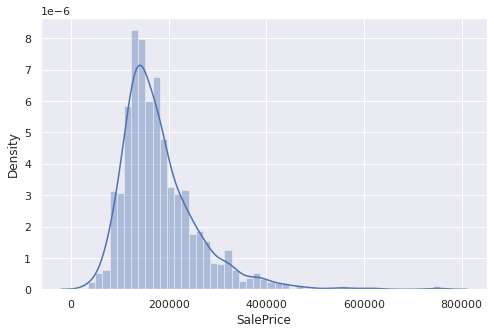

In [1085]:
sbn.distplot(deneme_train['SalePrice'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


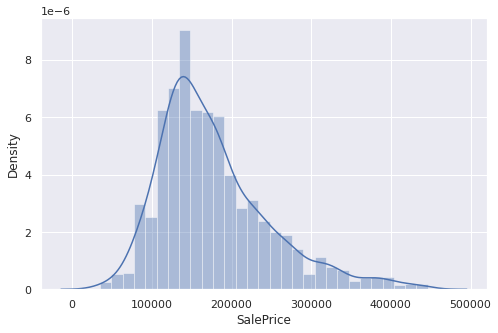

In [1086]:
deneme_train = deneme_train.sort_values(by='SalePrice', ascending=False)
deneme_train = deneme_train.drop(deneme_train.index[0:14])
sbn.distplot(deneme_train["SalePrice"])

In [1087]:
x = deneme_train.drop(['SalePrice'], axis=1)
y = deneme_train['SalePrice']

In [1088]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = 42)

In [1089]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Fitting the x_train and y_train on the model
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8711303350602041

In [1090]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train) ## fitting the data
rfr.score(x_test,y_test)

0.8720722466971533

In [1091]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7492041049441109

In [1092]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB.fit(x_train,y_train) 
XGB.score(x_test,y_test)

[13:24:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8945810789604446

In [1093]:
deneme_train

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
527,3,0,3,4,0,16,2,0,5,3,...,858,126,66,0,0,0,0,11,2008,446261
473,3,0,3,4,0,16,2,0,2,1,...,908,250,63,0,0,0,0,7,2007,440000
58,3,1,1,1,0,22,2,0,5,3,...,641,192,0,37,0,0,0,10,2006,438780
349,3,1,3,4,0,16,2,0,5,3,...,706,0,0,0,0,0,0,4,2006,437154
496,3,0,3,4,0,15,2,0,2,3,...,546,264,75,291,0,0,0,5,2007,430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,0,3,3,4,0,9,1,0,5,2,...,250,0,54,172,0,0,0,7,2008,40000
533,3,3,2,4,1,3,2,0,2,1,...,0,0,0,0,0,0,0,1,2007,39300
968,4,3,3,4,0,17,2,0,0,1,...,0,0,0,0,0,0,0,5,2009,37900
916,0,3,3,4,0,9,2,0,2,1,...,308,0,0,0,0,0,0,10,2006,35311
